In [97]:
import pandas as pd
import numpy as np 
import yfinance as yf
import time
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [98]:
nvidia = yf.Ticker('NVDA')

In [142]:
test = nvidia.history(perdiod = '6m',interval='5m')

In [100]:
time.asctime()

'Wed Jan 27 06:39:24 2021'

***Time loop creation***

In [143]:
#figuring out how to pull current date https://www.programiz.com/python-programming/datetime/current-datetime
today = test.loc[test.index >= (datetime.datetime.now()-datetime.timedelta(days=1)).strftime('%Y-%m-%d 09:30')]

In [101]:
# while int(time.asctime().split()[3].replace(':','')) < 163000:
#     print(time.asctime())
#     time.sleep(30)

In [102]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1558 entries, 2020-12-28 09:30:00-05:00 to 2021-01-26 15:55:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1558 non-null   float64
 1   High          1558 non-null   float64
 2   Low           1558 non-null   float64
 3   Close         1558 non-null   float64
 4   Volume        1558 non-null   int64  
 5   Dividends     1558 non-null   int64  
 6   Stock Splits  1558 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 97.4 KB


***Creating OBV***

In [103]:
#zip learned: https://stackoverflow.com/questions/1663807/how-to-iterate-through-two-lists-in-parallel
obv = []
prev = 0
obv_num = 0 
for close,volume in  zip(test['Close'], test['Volume']):
    if close> prev:
        obv_num += volume
        prev = close
        obv.append(obv_num)
    elif close < prev:
        obv_num -= volume
        prev = close 
        obv.append(obv_num)
    else:
        obv.append(obv_num)


test['OBV'] = obv

***Creating Simple Buy decision***

In [104]:
Buy = np.where(test['Close'].shift(-6) > test['Close'],1,0)
test['Buy'] = Buy2
test['Buy'].tail(15)

Datetime
2021-01-26 14:45:00-05:00    1
2021-01-26 14:50:00-05:00    1
2021-01-26 14:55:00-05:00    0
2021-01-26 15:00:00-05:00    0
2021-01-26 15:05:00-05:00    0
2021-01-26 15:10:00-05:00    0
2021-01-26 15:15:00-05:00    0
2021-01-26 15:20:00-05:00    0
2021-01-26 15:25:00-05:00    0
2021-01-26 15:30:00-05:00    0
2021-01-26 15:35:00-05:00    0
2021-01-26 15:40:00-05:00    0
2021-01-26 15:45:00-05:00    0
2021-01-26 15:50:00-05:00    0
2021-01-26 15:55:00-05:00    0
Name: Buy, dtype: int32

In [105]:
Buy2

array([0, 0, 0, ..., 0, 0, 0])

In [106]:
prev = 0
Buy = []
for close in test['Close']:
    if close > prev:
        Buy.append(1)
        prev = close 
    elif close <= prev:
        Buy.append(0)
        prev = close
test['Buy'] = Buy

***Rolling Hour Average***

In [107]:
test['Rolling_hour_average'] =test['Close'].rolling(12).mean()

***Creating a Above Average Column***

In [108]:
test['Above_average'] = [1 if close > average else 0 for close,average in zip(test['Close'],test['Rolling_hour_average'])]

In [109]:
test.tail(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,OBV,Buy,Rolling_hour_average,Above_average
Datetime,,,,,,,,,,,
2021-01-26 14:20:00-05:00,537.929993,538.497620,537.539978,538.130005,28402,0,0,2493941,1,538.835663,0
2021-01-26 14:25:00-05:00,538.179993,538.400024,537.118896,538.169983,48454,0,0,2542395,1,538.776484,0
2021-01-26 14:30:00-05:00,538.080505,538.872803,537.924988,538.417114,20123,0,0,2562518,1,538.719162,0
2021-01-26 14:35:00-05:00,538.559998,538.900024,538.400024,538.500000,24379,0,0,2586897,1,538.692078,0
2021-01-26 14:40:00-05:00,538.734985,539.349976,538.020020,538.244995,31285,0,0,2555612,0,538.626658,0
2021-01-26 14:45:00-05:00,538.150024,538.609070,537.929993,538.200012,27505,0,0,2528107,0,538.546519,0
2021-01-26 14:50:00-05:00,538.150024,538.361572,537.469971,537.875000,113337,0,0,2414770,0,538.415593,0
2021-01-26 14:55:00-05:00,538.010010,538.700012,538.010010,538.500000,19497,0,0,2434267,1,538.363093,1
2021-01-26 15:00:00-05:00,538.500000,538.539978,538.044983,538.096619,16002,0,0,2418265,0,538.289480,0


In [110]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1558 entries, 2020-12-28 09:30:00-05:00 to 2021-01-26 15:55:00-05:00
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  1558 non-null   float64
 1   High                  1558 non-null   float64
 2   Low                   1558 non-null   float64
 3   Close                 1558 non-null   float64
 4   Volume                1558 non-null   int64  
 5   Dividends             1558 non-null   int64  
 6   Stock Splits          1558 non-null   int64  
 7   OBV                   1558 non-null   int64  
 8   Buy                   1558 non-null   int64  
 9   Rolling_hour_average  1547 non-null   float64
 10  Above_average         1558 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 146.1 KB


***CREATING ADX METRIC***

In [111]:
#Code and library adapted from https://blog.quantinsti.com/adx-indicator-python/
high_low = []
abs_high_prev = []
abs_low_prev = []
prev = 0
for close,high,low in zip(test['Close'],test['High'],test['Low']):
    high_low.append(abs(high-low))
    abs_high_prev.append(abs(high-prev))
    abs_low_prev.append(abs(low-prev))
    prev = close 
from ta.trend import ADXIndicator
test['high_low'] = high_low
test['abs_high_prev'] = abs_high_prev
test['abs_low_prev'] = abs_low_prev
adx = ADXIndicator(test['high_low'],test['abs_high_prev'],test['abs_low_prev'])
test['adx'] = adx.adx()
test.drop(columns= ['high_low','abs_high_prev','abs_low_prev'], inplace = True)

***Creation of Aroon Indicator***

In [112]:
#https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html
from ta.trend import AroonIndicator
aroon = AroonIndicator(test['Close'])
test['Aroon_Indicator'] = aroon.aroon_indicator()

***MACD Indicator***

In [113]:
#https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html
from ta.trend import MACD
Macd = MACD(test['Close'])
test['MACD'] = Macd.macd()

In [114]:
test.head(30)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,OBV,Buy,Rolling_hour_average,Above_average,adx,Aroon_Indicator,MACD
Datetime,,,,,,,,,,,,,,
2020-12-28 09:30:00-05:00,522.500000,522.500000,519.870972,520.559387,309107,0,0,309107,1,NaN,0,0.000000,NaN,NaN
2020-12-28 09:35:00-05:00,521.320007,521.570007,518.895020,520.644775,125396,0,0,434503,1,NaN,0,0.000000,NaN,NaN
2020-12-28 09:40:00-05:00,520.739990,522.489014,520.640015,521.094727,134874,0,0,569377,1,NaN,0,0.000000,NaN,NaN
2020-12-28 09:45:00-05:00,520.630005,521.650024,520.219971,521.236023,61302,0,0,630679,1,NaN,0,0.000000,NaN,NaN
2020-12-28 09:50:00-05:00,521.000000,521.349976,519.989990,520.379089,58564,0,0,572115,0,NaN,0,0.000000,NaN,NaN
2020-12-28 09:55:00-05:00,520.289978,520.289978,519.250000,519.729980,68370,0,0,503745,0,NaN,0,0.000000,NaN,NaN
2020-12-28 10:00:00-05:00,519.710022,520.057617,517.280029,517.469971,129366,0,0,374379,0,NaN,0,0.000000,NaN,NaN
2020-12-28 10:05:00-05:00,517.400024,517.659973,515.059998,515.700012,166645,0,0,207734,0,NaN,0,0.000000,NaN,NaN
2020-12-28 10:10:00-05:00,515.700012,516.258484,512.820007,513.194214,185307,0,0,22427,0,NaN,0,0.000000,NaN,NaN


In [115]:
test.dropna(inplace = True)

In [116]:
test.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,OBV,Buy,Rolling_hour_average,Above_average,adx,Aroon_Indicator,MACD
Datetime,,,,,,,,,,,,,,
2020-12-28 11:35:00-05:00,516.664978,516.770020,515.729980,515.900024,42759,0,0,105037,0,516.262243,0,0.000000,-24.0,-0.499464
2020-12-28 11:40:00-05:00,515.700012,515.960388,515.000000,515.039978,45629,0,0,59408,0,516.278076,0,0.000000,-24.0,-0.563834
2020-12-28 11:45:00-05:00,515.039978,515.369995,514.239990,514.260010,62961,0,0,-3553,0,516.258753,0,98.101830,-24.0,-0.670060
2020-12-28 11:50:00-05:00,514.380005,515.239075,513.900024,515.229980,37551,0,0,33998,1,516.265416,0,98.047874,-20.0,-0.668273
2020-12-28 11:55:00-05:00,515.160889,515.599976,514.877808,515.539978,36648,0,0,70646,1,516.162913,0,97.998420,-16.0,-0.634528


In [117]:
#https://blog.quantinsti.com/machine-learning-logistic-regression-python/
features = ['Close','OBV','Rolling_hour_average','Above_average','adx','Aroon_Indicator','MACD']
X = test[features]
y = test['Buy']
y2 = np.where(test['Close'].shift(-1) > test['Close'],1,0)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.7, random_state = 6)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y2, train_size=.7, random_state = 6)

In [118]:
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.5304347826086957

In [119]:
model2 = LogisticRegression()
model2.fit(X_train2,y_train2)
model2.score(X_test2,y_test2)

0.5152173913043478

In [120]:
test['Buy'][2]

0

In [121]:
test['Buy'].shift(-1)

Datetime
2020-12-28 11:35:00-05:00    0.0
2020-12-28 11:40:00-05:00    0.0
2020-12-28 11:45:00-05:00    1.0
2020-12-28 11:50:00-05:00    1.0
2020-12-28 11:55:00-05:00    1.0
                            ... 
2021-01-26 15:35:00-05:00    1.0
2021-01-26 15:40:00-05:00    0.0
2021-01-26 15:45:00-05:00    1.0
2021-01-26 15:50:00-05:00    0.0
2021-01-26 15:55:00-05:00    NaN
Name: Buy, Length: 1533, dtype: float64

In [122]:
test['Buy']

Datetime
2020-12-28 11:35:00-05:00    0
2020-12-28 11:40:00-05:00    0
2020-12-28 11:45:00-05:00    0
2020-12-28 11:50:00-05:00    1
2020-12-28 11:55:00-05:00    1
                            ..
2021-01-26 15:35:00-05:00    0
2021-01-26 15:40:00-05:00    1
2021-01-26 15:45:00-05:00    0
2021-01-26 15:50:00-05:00    1
2021-01-26 15:55:00-05:00    0
Name: Buy, Length: 1533, dtype: int64

***Creating a 6 entry shift for predicting 5 minute out predictions up 30 minutes out*** UPADATED 11:13 needs to go into tuesday 

In [123]:
from sklearn.linear_model import LinearRegression


lin_features = ['Volume','OBV', 'Buy', 'Rolling_hour_average', 'Above_average', 'adx','Aroon_Indicator', 'MACD','Close']
forcast = test[lin_features][-6:]
print(forcast)
test['predictions'] = test['Close'].shift(-6)
print(test['predictions'].tail(7))
test.dropna(inplace = True)
lin_X = test[lin_features]
lin_y = test['predictions']
X_train, X_test, y_train, y_test = train_test_split(lin_X,lin_y, train_size=.7, random_state = 6)

lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
print(f'Accuracy: {lin_model.score(X_test,y_test)}')


forcast['predictions'] = lin_model.predict(forcast)
#Resetting times to forcast
forcast.drop(columns =['Volume', 'OBV', 'Buy', 'Rolling_hour_average', 'Above_average', 'adx',
                       'Aroon_Indicator', 'MACD', 'Close'],inplace = True)
changer = forcast.index.to_pydatetime()
changer = [x+datetime.timedelta(minutes=30) for x in changer]
forcast.index = pd.DatetimeIndex(changer)

forcast 

                           Volume      OBV  Buy  Rolling_hour_average  \
Datetime                                                                
2021-01-26 15:30:00-05:00   61228  2331585    0            538.468053   
2021-01-26 15:35:00-05:00  114486  2217099    0            538.278885   
2021-01-26 15:40:00-05:00   50680  2267779    1            538.162633   
2021-01-26 15:45:00-05:00   77330  2190449    0            538.024892   
2021-01-26 15:50:00-05:00   89992  2280441    1            537.996974   
2021-01-26 15:55:00-05:00  197777  2082664    0            537.906138   

                           Above_average        adx  Aroon_Indicator  \
Datetime                                                               
2021-01-26 15:30:00-05:00              0  13.627169            -16.0   
2021-01-26 15:35:00-05:00              0  13.582632            -20.0   
2021-01-26 15:40:00-05:00              0  13.541276            -20.0   
2021-01-26 15:45:00-05:00              0  13.502874    

,predictions
2021-01-26 16:00:00-05:00,536.144825
2021-01-26 16:05:00-05:00,535.762997
2021-01-26 16:10:00-05:00,536.294405
2021-01-26 16:15:00-05:00,536.007991
2021-01-26 16:20:00-05:00,537.181739
2021-01-26 16:25:00-05:00,537.475873


***Pulling Current date and previous date***

In [124]:
#figuring out how to pull current date https://www.programiz.com/python-programming/datetime/current-datetime
today = test.loc[test.index >= (datetime.datetime.now()-datetime.timedelta(days=1)).strftime('%Y-%m-%d 09:30')]

In [133]:
a =pd.date_range(end = datetime.datetime.now(),start = (datetime.datetime.now()-datetime.timedelta(days=1)),periods =10, freq='30m')
a

ValueError: Of the four parameters: start, end, periods, and freq, exactly three must be specified

***Creating Fig***

In [140]:
forcast

,predictions
2021-01-26 16:00:00-05:00,536.144825
2021-01-26 16:05:00-05:00,535.762997
2021-01-26 16:10:00-05:00,536.294405
2021-01-26 16:15:00-05:00,536.007991
2021-01-26 16:20:00-05:00,537.181739
2021-01-26 16:25:00-05:00,537.475873


NameError: name 'stock' is not defined

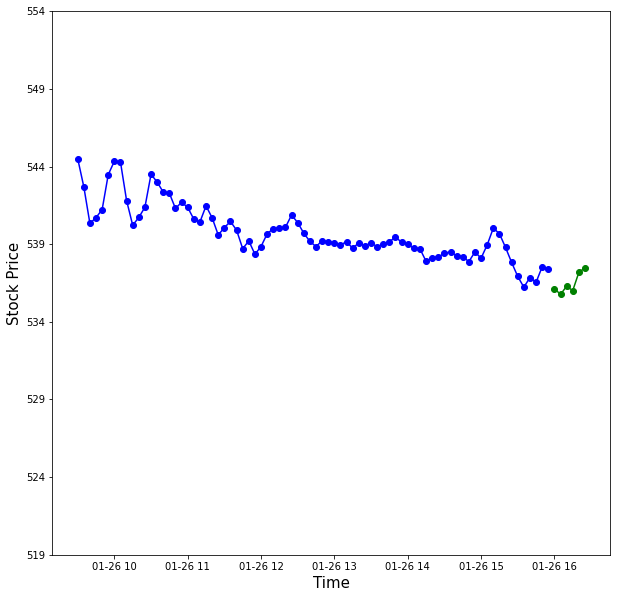

In [175]:
max_tick = int(today['Close'].mean() +20)
min_tick = int(today['Close'].mean() -20)
y_ticks = list(range(min_tick,max_tick,5))
plt.figure(figsize=(10,10))
plt.plot_date(today.index.to_pydatetime(), today['Close'],color= 'b')
plt.plot_date(forcast.index.to_pydatetime(), forcast['predictions'],color= 'g')
plt.plot(today.index.to_pydatetime(), today['Close'],color= 'b')
plt.plot(forcast.index.to_pydatetime(), forcast['predictions'],color= 'g')
plt.ylabel('Stock Price',fontsize= 15)
plt.yticks(y_ticks)
plt.xlabel('Time', fontsize = 15)
plt.title(f'{stock} Current and Project Price')

*Time Manager*

In [71]:
test.loc[test.index >= (datetime.datetime.now()-datetime.timedelta(days=1)).strftime('%Y-%m-%d 09:30')]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,OBV,Buy,Rolling_hour_average,Above_average,adx,Aroon_Indicator,MACD,predictions
Datetime,,,,,,,,,,,,,,,
2021-01-25 09:30:00-05:00,551.580688,553.140015,550.200012,550.330017,327402,0,0,2949788,1,550.766663,0,14.458481,-28.0,-0.347633,550.500000
2021-01-25 09:35:00-05:00,549.250000,552.599976,549.250000,550.492188,142288,0,0,3092076,1,550.666845,0,14.387129,-28.0,-0.312104,550.505005
2021-01-25 09:40:00-05:00,550.625000,551.940002,549.505005,551.320007,105169,0,0,3197245,1,550.665176,1,14.816664,-28.0,-0.214674,549.619995
2021-01-25 09:45:00-05:00,552.000000,552.260010,549.684998,550.030029,114715,0,0,3082530,0,550.529348,0,15.503493,-28.0,-0.238798,550.000000
2021-01-25 09:50:00-05:00,549.979980,550.710022,549.559998,549.760010,65764,0,0,3016766,0,550.217682,0,16.287915,-28.0,-0.276517,550.200012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-26 13:10:00-05:00,538.880005,539.320007,538.739990,539.155029,22476,0,0,2542835,1,539.557195,0,14.169436,-32.0,-0.531871,539.030029
2021-01-26 13:15:00-05:00,539.200012,539.289978,538.710022,538.734985,21263,0,0,2521572,0,539.448446,0,14.736987,-32.0,-0.543760,539.161682
2021-01-26 13:20:00-05:00,538.849976,539.229980,538.434875,539.090027,24555,0,0,2546127,1,539.365107,0,14.816043,24.0,-0.518557,539.446106


***SVC Linear***

In [93]:
test

,Open,High,Low,Close,Volume,Dividends,Stock Splits,OBV,Buy2,Rolling_hour_average,Above_average,adx,Aroon_Indicator,MACD
Datetime,,,,,,,,,,,,,,
2020-12-28 11:35:00-05:00,516.664978,516.770020,515.729980,515.900024,42759,0,0,105037,0,516.262243,0,0.000000,-24.0,-0.499464
2020-12-28 11:40:00-05:00,515.700012,515.960388,515.000000,515.039978,45629,0,0,59408,0,516.278076,0,0.000000,-24.0,-0.563834
2020-12-28 11:45:00-05:00,515.039978,515.369995,514.239990,514.260010,62961,0,0,-3553,1,516.258753,0,98.101830,-24.0,-0.670060
2020-12-28 11:50:00-05:00,514.380005,515.239075,513.900024,515.229980,37551,0,0,33998,0,516.265416,0,98.047874,-20.0,-0.668273
2020-12-28 11:55:00-05:00,515.160889,515.599976,514.877808,515.539978,36648,0,0,70646,0,516.162913,0,97.998420,-16.0,-0.634528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-26 15:35:00-05:00,536.750000,536.929993,535.500000,536.229980,114486,0,0,2217099,0,538.278885,0,13.582632,-20.0,-0.422352
2021-01-26 15:40:00-05:00,536.226501,536.989990,535.859985,536.849976,50680,0,0,2267779,0,538.162633,0,13.541276,-20.0,-0.488878
2021-01-26 15:45:00-05:00,536.830017,537.650024,536.547119,536.547119,77330,0,0,2190449,0,538.024892,0,13.502874,-20.0,-0.559588


In [94]:
#Code adapted from lesson 6.05
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [96]:
#Turn this into a classification network
#This was inspired from https://www.cs.princeton.edu/sites/default/files/uploads/saahil_madge.pdf
SVC_model = SVC()
sc = StandardScaler()
SVC_features = ['Volume','OBV', 'Rolling_hour_average', 'Above_average', 'adx','Aroon_Indicator', 'MACD','Close']
forcast = test[SVC_features][-6:]
SVC_X = test[SVC_features]
SVC_X_scaled = sc.fit_transform(SVC_X)
SVC_y = test['Buy2']
X_train, X_test, y_train, y_test = train_test_split(SVC_X_scaled,SVC_y, train_size=.7, random_state = 6)
SVC_model = model.fit(X_train,y_train)
print(f'SVC score at {SVC_model.score(X_test,y_test)}')
forcast['SVC_UpValue_Predictions'] = SVC_model.predict(forcast)
forcast

SVC score at 0.5565217391304348


,Volume,OBV,Rolling_hour_average,Above_average,adx,Aroon_Indicator,MACD,Close,SVC_Up_Predictions
Datetime,,,,,,,,,
2021-01-26 15:30:00-05:00,61228,2331585,538.468053,0,13.627169,-16.0,-0.268170,536.922485,0
2021-01-26 15:35:00-05:00,114486,2217099,538.278885,0,13.582632,-20.0,-0.422352,536.229980,0
2021-01-26 15:40:00-05:00,50680,2267779,538.162633,0,13.541276,-20.0,-0.488878,536.849976,0
2021-01-26 15:45:00-05:00,77330,2190449,538.024892,0,13.502874,-20.0,-0.559588,536.547119,0
2021-01-26 15:50:00-05:00,89992,2280441,537.996974,0,13.092428,-20.0,-0.529408,537.539978,0
2021-01-26 15:55:00-05:00,197777,2082664,537.906138,0,13.523938,-20.0,-0.510100,537.409973,0
